# Crane Log analyzer

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math  # Import the math module


# EDA

In [379]:
# Define the filename
LpsData_STS405b = "LpsData_STS405b.txt"  # Replace "your_file_path_here.txt" with the path to your file
LpsData_TILsts = "LpsData_TILsts.txt"  # Replace "your_file_path_here.txt" with the path to your file

# Define the column names
column_names = [
    "MarkersValid", "TrolleyPos", "Hoistpos", "NoOfMarkers", 
    "m1", "m2", "m3", "m4", "m5", "m6", 
]

# Read the file into a DataFrame
df_LpsData_STS405b = pd.read_csv(LpsData_STS405b, header=None, names=column_names, delimiter=", ", engine='python')
df_LpsData_TILsts = pd.read_csv(LpsData_TILsts, header=None, names=column_names, delimiter=", ", engine='python')


In [380]:
df_LpsData_STS405b.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6
0,MarkersValid: True,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)"
1,MarkersValid: True,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)"
2,MarkersValid: True,TrolleyPos: -10.940,Hoistpos: 6.401,NoOfMarkers: 3,"m1: (65193,62799)","m2: (65484,65535)","m3: (65016,68183)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)"
3,MarkersValid: True,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)"
4,MarkersValid: True,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)"


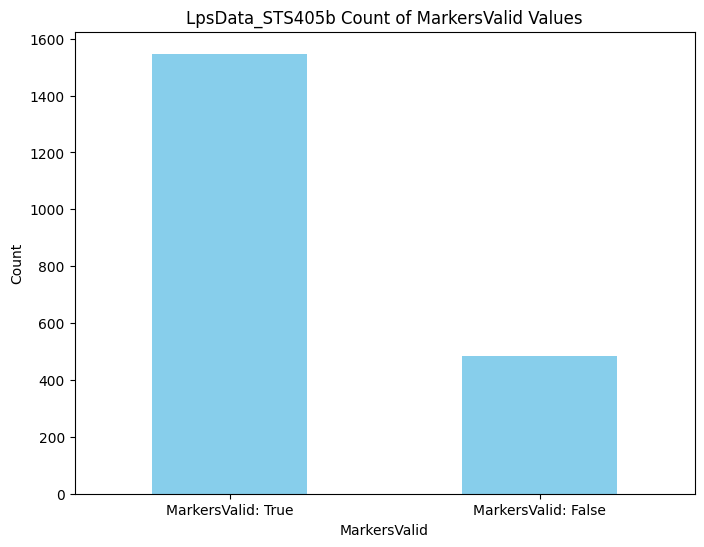

In [381]:
# Plotting
plt.figure(figsize=(8, 6))
df_LpsData_STS405b['MarkersValid'].value_counts().plot(kind='bar', color='skyblue')
plt.title('LpsData_STS405b Count of MarkersValid Values')
plt.xlabel('MarkersValid')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [382]:
df_LpsData_TILsts.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6
T:2021-08-02 11:59:07.233000,MarkersValid: True,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63382,63453)","m2: (68948,63504)","m3: (66250,63637)","m4: (46590,100851)","m5: (80082,111422)","m6: (91254,120923)"
T:2021-08-02 11:59:07.537000,MarkersValid: True,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 5,"m1: (63381,63453)","m2: (68946,63504)","m3: (66250,63636)","m4: (88349,103933)","m5: (111103,109365)","m6: (38222,109347)"
T:2021-08-02 11:59:08.038000,MarkersValid: True,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63386,63452)","m2: (68951,63503)","m3: (66255,63633)","m4: (111109,113055)","m5: (129417,119518)","m6: (127152,123718)"
T:2021-08-02 11:59:08.556000,MarkersValid: True,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63384,63457)","m2: (68950,63508)","m3: (66256,63644)","m4: (115677,108628)","m5: (105525,110415)","m6: (94293,121239)"
T:2021-08-02 11:59:09.056000,MarkersValid: True,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 7,"m1: (63376,63459)","m2: (68942,63511)","m3: (66248,63649)","m4: (98350,95010)","m5: (64812,101301)","m6: (122626,112416)"


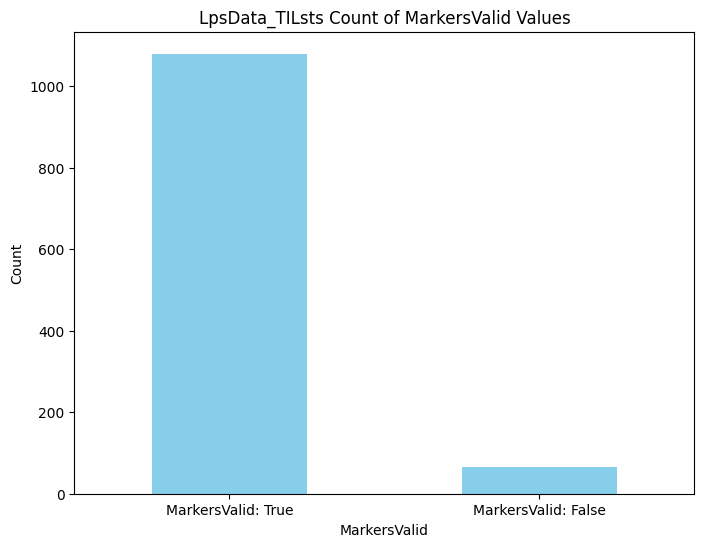

In [383]:
# Plotting
plt.figure(figsize=(8, 6))
df_LpsData_TILsts['MarkersValid'].value_counts().plot(kind='bar', color='skyblue')
plt.title('LpsData_TILsts Count of MarkersValid Values')
plt.xlabel('MarkersValid')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [384]:
df_LpsData_TILsts['MarkersValid'] = df_LpsData_TILsts['MarkersValid'].map({'MarkersValid: False': 0, 'MarkersValid: True': 1})
df_LpsData_STS405b['MarkersValid'] = df_LpsData_STS405b['MarkersValid'].map({'MarkersValid: False': 0, 'MarkersValid: True': 1})

## x and y coordinate

In [385]:
# Extract the (x, y) coordinates of markers m1, m2, and m3
marker_columns = ['m1', 'm2', 'm3']
for col in marker_columns:
    df_LpsData_TILsts[col + '_x'] = df_LpsData_TILsts[col].str.extract(r'\((\d+),(\d+)\)').astype(int).iloc[:, 0]
    df_LpsData_TILsts[col + '_y'] = df_LpsData_TILsts[col].str.extract(r'\((\d+),(\d+)\)').astype(int).iloc[:, 1]
df_LpsData_TILsts.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,m1_x,m1_y,m2_x,m2_y,m3_x,m3_y
T:2021-08-02 11:59:07.233000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63382,63453)","m2: (68948,63504)","m3: (66250,63637)","m4: (46590,100851)","m5: (80082,111422)","m6: (91254,120923)",63382,63453,68948,63504,66250,63637
T:2021-08-02 11:59:07.537000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 5,"m1: (63381,63453)","m2: (68946,63504)","m3: (66250,63636)","m4: (88349,103933)","m5: (111103,109365)","m6: (38222,109347)",63381,63453,68946,63504,66250,63636
T:2021-08-02 11:59:08.038000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63386,63452)","m2: (68951,63503)","m3: (66255,63633)","m4: (111109,113055)","m5: (129417,119518)","m6: (127152,123718)",63386,63452,68951,63503,66255,63633
T:2021-08-02 11:59:08.556000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63384,63457)","m2: (68950,63508)","m3: (66256,63644)","m4: (115677,108628)","m5: (105525,110415)","m6: (94293,121239)",63384,63457,68950,63508,66256,63644
T:2021-08-02 11:59:09.056000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 7,"m1: (63376,63459)","m2: (68942,63511)","m3: (66248,63649)","m4: (98350,95010)","m5: (64812,101301)","m6: (122626,112416)",63376,63459,68942,63511,66248,63649


In [386]:
# Extract the (x, y) coordinates of markers m1, m2, and m3
marker_columns = ['m1', 'm2', 'm3']
for col in marker_columns:
    df_LpsData_STS405b[col + '_x'] = df_LpsData_STS405b[col].str.extract(r'\((\d+),(\d+)\)').astype(int).iloc[:, 0]
    df_LpsData_STS405b[col + '_y'] = df_LpsData_STS405b[col].str.extract(r'\((\d+),(\d+)\)').astype(int).iloc[:, 1]
df_LpsData_STS405b.head()


,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,m1_x,m1_y,m2_x,m2_y,m3_x,m3_y
0,1,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",65122,62961,65383,65641,64929,68233
1,1,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",65122,62961,65383,65641,64929,68233
2,1,TrolleyPos: -10.940,Hoistpos: 6.401,NoOfMarkers: 3,"m1: (65193,62799)","m2: (65484,65535)","m3: (65016,68183)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",65193,62799,65484,65535,65016,68183
3,1,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",65137,62737,65421,65513,64964,68196
4,1,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",65137,62737,65421,65513,64964,68196


## displacement

In [387]:
# Calculate displacement for each marker in x and y directions
for marker in ['m1', 'm2', 'm3']:
    df_LpsData_STS405b[f'{marker}_x_displacement'] = df_LpsData_STS405b[f'{marker}_x'].diff()
    df_LpsData_STS405b[f'{marker}_y_displacement'] = df_LpsData_STS405b[f'{marker}_y'].diff()
df_LpsData_STS405b.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m2_x,m2_y,m3_x,m3_y,m1_x_displacement,m1_y_displacement,m2_x_displacement,m2_y_displacement,m3_x_displacement,m3_y_displacement
0,1,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",...,65383,65641,64929,68233,NaN,NaN,NaN,NaN,NaN,NaN
1,1,TrolleyPos: -10.938,Hoistpos: 5.290,NoOfMarkers: 3,"m1: (65122,62961)","m2: (65383,65641)","m3: (64929,68233)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",...,65383,65641,64929,68233,0.0,0.0,0.0,0.0,0.0,0.0
2,1,TrolleyPos: -10.940,Hoistpos: 6.401,NoOfMarkers: 3,"m1: (65193,62799)","m2: (65484,65535)","m3: (65016,68183)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",...,65484,65535,65016,68183,71.0,-162.0,101.0,-106.0,87.0,-50.0
3,1,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",...,65421,65513,64964,68196,-56.0,-62.0,-63.0,-22.0,-52.0,13.0
4,1,TrolleyPos: -10.939,Hoistpos: 7.130,NoOfMarkers: 3,"m1: (65137,62737)","m2: (65421,65513)","m3: (64964,68196)","m4: (53988,70329)","m5: (69367,70476)","m6: (128541,76826)",...,65421,65513,64964,68196,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
# Calculate displacement for each marker in x and y directions
for marker in ['m1', 'm2', 'm3']:
    df_LpsData_TILsts[f'{marker}_x_displacement'] = df_LpsData_TILsts[f'{marker}_x'].diff()
    df_LpsData_TILsts[f'{marker}_y_displacement'] = df_LpsData_TILsts[f'{marker}_y'].diff()

df_LpsData_TILsts.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m2_x,m2_y,m3_x,m3_y,m1_x_displacement,m1_y_displacement,m2_x_displacement,m2_y_displacement,m3_x_displacement,m3_y_displacement
T:2021-08-02 11:59:07.233000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63382,63453)","m2: (68948,63504)","m3: (66250,63637)","m4: (46590,100851)","m5: (80082,111422)","m6: (91254,120923)",...,68948,63504,66250,63637,NaN,NaN,NaN,NaN,NaN,NaN
T:2021-08-02 11:59:07.537000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 5,"m1: (63381,63453)","m2: (68946,63504)","m3: (66250,63636)","m4: (88349,103933)","m5: (111103,109365)","m6: (38222,109347)",...,68946,63504,66250,63636,-1.0,0.0,-2.0,0.0,0.0,-1.0
T:2021-08-02 11:59:08.038000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63386,63452)","m2: (68951,63503)","m3: (66255,63633)","m4: (111109,113055)","m5: (129417,119518)","m6: (127152,123718)",...,68951,63503,66255,63633,5.0,-1.0,5.0,-1.0,5.0,-3.0
T:2021-08-02 11:59:08.556000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63384,63457)","m2: (68950,63508)","m3: (66256,63644)","m4: (115677,108628)","m5: (105525,110415)","m6: (94293,121239)",...,68950,63508,66256,63644,-2.0,5.0,-1.0,5.0,1.0,11.0
T:2021-08-02 11:59:09.056000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 7,"m1: (63376,63459)","m2: (68942,63511)","m3: (66248,63649)","m4: (98350,95010)","m5: (64812,101301)","m6: (122626,112416)",...,68942,63511,66248,63649,-8.0,2.0,-8.0,3.0,-8.0,5.0


## Speed

In [389]:
def calculate_speed(df):
    """
    Calculates the speed of markers m1, m2, and m3 based on their x and y coordinates.

    Args:
    df (pandas.DataFrame): DataFrame containing the x and y coordinates of the markers.

    Returns:
    pandas.DataFrame: DataFrame with added columns 'm1_speed', 'm2_speed', and 'm3_speed'.
    """
    # Calculate the distance between consecutive points
    df['m1_distance'] = np.sqrt((df['m1_x'].diff())**2 + (df['m1_y'].diff())**2)
    df['m2_distance'] = np.sqrt((df['m2_x'].diff())**2 + (df['m2_y'].diff())**2)
    df['m3_distance'] = np.sqrt((df['m3_x'].diff())**2 + (df['m3_y'].diff())**2)

    # Calculate the time difference between consecutive points
    df['time_elapsed'] = 2000  # replace with actual time interval

    # Calculate the speed of the markers
    df['m1_speed'] = df['m1_distance'] / df['time_elapsed']
    df['m2_speed'] = df['m2_distance'] / df['time_elapsed']
    df['m3_speed'] = df['m3_distance'] / df['time_elapsed']

    # Drop the first row since it has NaN values
    df.dropna(inplace=True)

    return df

In [390]:
df_LpsData_TILsts = calculate_speed(df_LpsData_TILsts)
df_LpsData_TILsts.tail()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m2_y_displacement,m3_x_displacement,m3_y_displacement,m1_distance,m2_distance,m3_distance,time_elapsed,m1_speed,m2_speed,m3_speed
T:2021-08-02 12:07:04.883000,1,TrolleyPos: 23.434,Hoistpos: 6.610,NoOfMarkers: 5,"m1: (62524,62861)","m2: (65387,62926)","m3: (68274,62883)","m4: (119597,129140)","m5: (112853,129316)","m6: (105720,129837)",...,-146.0,2845.0,-300.0,210.107116,2932.636527,2860.773497,2000,0.105054,1.466318,1.430387
T:2021-08-02 12:07:05.383000,1,TrolleyPos: 23.445,Hoistpos: 6.570,NoOfMarkers: 3,"m1: (62537,62684)","m2: (65400,62773)","m3: (68280,62735)","m4: (126358,121013)","m5: (125389,122156)","m6: (121913,130318)",...,-153.0,6.0,-148.0,177.476759,153.551294,148.121572,2000,0.088738,0.076776,0.074061
T:2021-08-02 12:07:05.880000,1,TrolleyPos: 23.451,Hoistpos: 6.532,NoOfMarkers: 3,"m1: (62556,62512)","m2: (65417,62604)","m3: (68295,62577)","m4: (109547,121857)","m5: (102551,127212)","m6: (121913,130318)",...,-169.0,15.0,-158.0,173.046237,169.852878,158.710428,2000,0.086523,0.084926,0.079355
T:2021-08-02 12:07:06.379000,1,TrolleyPos: 23.462,Hoistpos: 6.501,NoOfMarkers: 3,"m1: (62563,62377)","m2: (65421,62453)","m3: (68299,62444)","m4: (124293,127619)","m5: (106254,122774)","m6: (127341,124402)",...,-151.0,4.0,-133.0,135.181360,151.052971,133.060137,2000,0.067591,0.075526,0.066530
T:2021-08-02 12:07:06.881001,1,TrolleyPos: 23.460,Hoistpos: 6.478,NoOfMarkers: 4,"m1: (62565,62388)","m2: (65425,62471)","m3: (68298,62453)","m4: (126540,124817)","m5: (126213,124827)","m6: (119180,130632)",...,18.0,-1.0,9.0,11.180340,18.439089,9.055385,2000,0.005590,0.009220,0.004528


In [391]:
df_LpsData_STS405b = calculate_speed(df_LpsData_STS405b)
df_LpsData_STS405b.tail()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m2_y_displacement,m3_x_displacement,m3_y_displacement,m1_distance,m2_distance,m3_distance,time_elapsed,m1_speed,m2_speed,m3_speed
2026,0,TrolleyPos: 76.304,Hoistpos: 17.373,NoOfMarkers: 16,"m1: (129742,9771)","m2: (90538,12394)","m3: (92735,20024)","m4: (122924,25132)","m5: (109428,29486)","m6: (129156,34378)",...,8905.0,12086.0,15846.0,7719.145095,35746.935883,19929.051959,2000,3.859573,17.873468,9.964526
2027,1,TrolleyPos: 76.304,Hoistpos: 17.568,NoOfMarkers: 20,"m1: (116619,3546)","m2: (124291,9583)","m3: (102440,10289)","m4: (114139,12439)","m5: (102114,16451)","m6: (126723,20361)",...,-2811.0,9705.0,-9735.0,14524.591354,33869.849867,13746.172194,2000,7.262296,16.934925,6.873086
2028,1,TrolleyPos: 76.304,Hoistpos: 17.568,NoOfMarkers: 20,"m1: (116619,3546)","m2: (124291,9583)","m3: (102440,10289)","m4: (114139,12439)","m5: (102114,16451)","m6: (126723,20361)",...,0.0,0.0,0.0,0.000000,0.000000,0.000000,2000,0.000000,0.000000,0.000000
2029,0,TrolleyPos: 76.301,Hoistpos: 17.800,NoOfMarkers: 20,"m1: (125299,7922)","m2: (96929,17846)","m3: (95133,19172)","m4: (91726,22482)","m5: (124836,24968)","m6: (101164,29012)",...,8263.0,-7307.0,8883.0,9720.688041,28582.445889,11502.171012,2000,4.860344,14.291223,5.751086
2030,1,TrolleyPos: 76.302,Hoistpos: 18.059,NoOfMarkers: 14,"m1: (100906,10277)","m2: (117607,14528)","m3: (108709,16813)","m4: (100282,17396)","m5: (98475,23681)","m6: (99430,27784)",...,-3318.0,13576.0,-2359.0,24506.416996,20942.511979,13779.428762,2000,12.253208,10.471256,6.889714


## triangle area

In [392]:
# Function to calculate the triangle area
def calculate_triangle_area(row):
    m1_x, m1_y = row['m1_x'], row['m1_y']
    m2_x, m2_y = row['m2_x'], row['m2_y']
    m3_x, m3_y = row['m3_x'], row['m3_y']
    
    side1 = math.sqrt((m2_x - m1_x)**2 + (m2_y - m1_y)**2)
    side2 = math.sqrt((m3_x - m2_x)**2 + (m3_y - m2_y)**2)
    side3 = math.sqrt((m1_x - m3_x)**2 + (m1_y - m3_y)**2)
    
    s = (side1 + side2 + side3) / 2
    area = math.sqrt(s * (s - side1) * (s - side2) * (s - side3))
    return area

# Calculate triangle area for each row and add it as a new column
df_LpsData_STS405b['TriangleArea'] = df_LpsData_STS405b.apply(calculate_triangle_area, axis=1)
df_LpsData_TILsts['TriangleArea'] = df_LpsData_TILsts.apply(calculate_triangle_area, axis=1)

In [393]:
df_LpsData_TILsts.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m3_x_displacement,m3_y_displacement,m1_distance,m2_distance,m3_distance,time_elapsed,m1_speed,m2_speed,m3_speed,TriangleArea
T:2021-08-02 11:59:07.537000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 5,"m1: (63381,63453)","m2: (68946,63504)","m3: (66250,63636)","m4: (88349,103933)","m5: (111103,109365)","m6: (38222,109347)",...,0.0,-1.0,1.000000,2.000000,1.000000,2000,0.000500,0.001000,0.000500,436038.0
T:2021-08-02 11:59:08.038000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63386,63452)","m2: (68951,63503)","m3: (66255,63633)","m4: (111109,113055)","m5: (129417,119518)","m6: (127152,123718)",...,5.0,-3.0,5.099020,5.099020,5.830952,2000,0.002550,0.002550,0.002915,430473.0
T:2021-08-02 11:59:08.556000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 6,"m1: (63384,63457)","m2: (68950,63508)","m3: (66256,63644)","m4: (115677,108628)","m5: (105525,110415)","m6: (94293,121239)",...,1.0,11.0,5.385165,5.099020,11.045361,2000,0.002693,0.002550,0.005523,447185.0
T:2021-08-02 11:59:09.056000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 7,"m1: (63376,63459)","m2: (68942,63511)","m3: (66248,63649)","m4: (98350,95010)","m5: (64812,101301)","m6: (122626,112416)",...,-8.0,5.0,8.246211,8.544004,9.433981,2000,0.004123,0.004272,0.004717,454098.0
T:2021-08-02 11:59:09.559000,1,TrolleyPos: 28.285,Hoistpos: 4.947,NoOfMarkers: 9,"m1: (63385,63465)","m2: (68949,63515)","m3: (66259,63651)","m4: (91922,104463)","m5: (97733,107136)","m6: (100846,118564)",...,11.0,2.0,10.816654,8.062258,11.180340,2000,0.005408,0.004031,0.005590,445602.0


# Ml to predict correctness of log

In [394]:
df_LpsData_TILsts
# Check for missing values in each column
missing_values = df_LpsData_TILsts.isnull().sum()

# Print columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [395]:
# Check for missing values in each column
missing_values = df_LpsData_STS405b.isnull().sum()

# Print columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [396]:
df_LpsData_STS405b.dropna(inplace=True)
df_LpsData_TILsts.dropna(inplace=True)

In [397]:
df_LpsData_TILsts
# Convert the column to string type
df_LpsData_TILsts['TrolleyPos'] = df_LpsData_TILsts['TrolleyPos'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_TILsts['TrolleyPos'] = df_LpsData_TILsts['TrolleyPos'].str.replace('TrolleyPos: ', '').astype(float)


In [398]:
# Convert the column to string type
df_LpsData_STS405b['TrolleyPos'] = df_LpsData_STS405b['TrolleyPos'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_STS405b['TrolleyPos'] = df_LpsData_STS405b['TrolleyPos'].str.replace('TrolleyPos: ', '').astype(float)


In [399]:
# Convert the column to string type
df_LpsData_TILsts['Hoistpos'] = df_LpsData_TILsts['Hoistpos'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_TILsts['Hoistpos'] = df_LpsData_TILsts['Hoistpos'].str.replace('Hoistpos: ', '').astype(float)


In [400]:
# Convert the column to string type
df_LpsData_STS405b['Hoistpos'] = df_LpsData_STS405b['Hoistpos'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_STS405b['Hoistpos'] = df_LpsData_STS405b['Hoistpos'].str.replace('Hoistpos: ', '').astype(float)


In [401]:
df_LpsData_TILsts
# Convert the column to string type
df_LpsData_TILsts['NoOfMarkers'] = df_LpsData_TILsts['NoOfMarkers'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_TILsts['NoOfMarkers'] = df_LpsData_TILsts['NoOfMarkers'].str.replace('NoOfMarkers: ', '').astype(float)


In [402]:
# Convert the column to string type
df_LpsData_STS405b['NoOfMarkers'] = df_LpsData_STS405b['NoOfMarkers'].astype(str)

# Remove non-numeric characters and convert to float
df_LpsData_STS405b['NoOfMarkers'] = df_LpsData_STS405b['NoOfMarkers'].str.replace('NoOfMarkers: ', '').astype(float)


In [403]:
df_LpsData_TILsts.dropna(inplace=True)

In [404]:
df_LpsData_STS405b.dropna(inplace=True)

In [405]:
df_LpsData_STS405b.tail()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6,...,m3_x_displacement,m3_y_displacement,m1_distance,m2_distance,m3_distance,time_elapsed,m1_speed,m2_speed,m3_speed,TriangleArea
2026,0,76.304,17.373,16.0,"m1: (129742,9771)","m2: (90538,12394)","m3: (92735,20024)","m4: (122924,25132)","m5: (109428,29486)","m6: (129156,34378)",...,12086.0,15846.0,7719.145095,35746.935883,19929.051959,2000,3.859573,17.873468,9.964526,152444625.5
2027,1,76.304,17.568,20.0,"m1: (116619,3546)","m2: (124291,9583)","m3: (102440,10289)","m4: (114139,12439)","m5: (102114,16451)","m6: (126723,20361)",...,9705.0,-9735.0,14524.591354,33869.849867,13746.172194,2000,7.262296,16.934925,6.873086,68665459.5
2028,1,76.304,17.568,20.0,"m1: (116619,3546)","m2: (124291,9583)","m3: (102440,10289)","m4: (114139,12439)","m5: (102114,16451)","m6: (126723,20361)",...,0.0,0.0,0.000000,0.000000,0.000000,2000,0.000000,0.000000,0.000000,68665459.5
2029,0,76.301,17.800,20.0,"m1: (125299,7922)","m2: (96929,17846)","m3: (95133,19172)","m4: (91726,22482)","m5: (124836,24968)","m6: (101164,29012)",...,-7307.0,8883.0,9720.688041,28582.445889,11502.171012,2000,4.860344,14.291223,5.751086,9897558.0
2030,1,76.302,18.059,14.0,"m1: (100906,10277)","m2: (117607,14528)","m3: (108709,16813)","m4: (100282,17396)","m5: (98475,23681)","m6: (99430,27784)",...,13576.0,-2359.0,24506.416996,20942.511979,13779.428762,2000,12.253208,10.471256,6.889714,37993591.5


## df_LpsData_TILsts

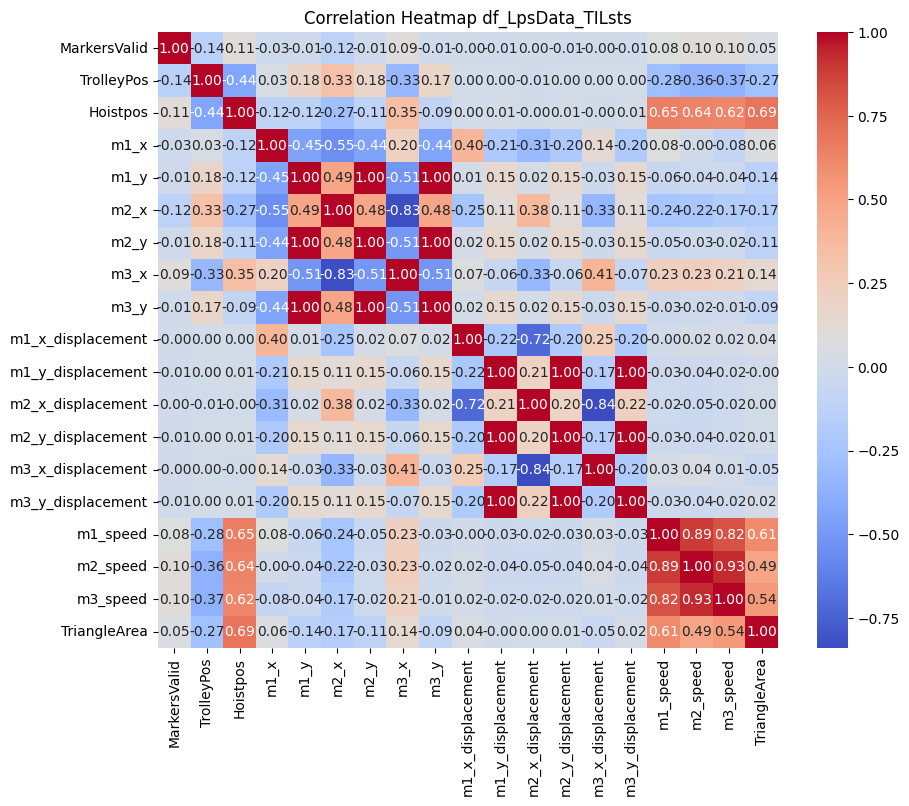

In [406]:
# Select relevant columns for correlation
columns_of_interest = ['MarkersValid','TrolleyPos', 'Hoistpos','m1_x',	'm1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y','m1_x_displacement', 'm1_y_displacement', 'm2_x_displacement', 'm2_y_displacement', 'm3_x_displacement', 'm3_y_displacement', 'm1_speed', 'm2_speed', 'm3_speed', "TriangleArea"]

# Calculate correlation matrix
correlation_matrix_df_LpsData_TILsts = df_LpsData_TILsts[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df_LpsData_TILsts, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap df_LpsData_TILsts')
plt.show()

### without speed

In [407]:
features = ['TrolleyPos', 'Hoistpos','m1_x','m1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y']

X = df_LpsData_TILsts[features]
y = df_LpsData_TILsts['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=11000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))


Logistic Regression:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       0.95      1.00      0.97       217

    accuracy                           0.95       229
   macro avg       0.97      0.50      0.49       229
weighted avg       0.95      0.95      0.92       229


Random Forest:
Accuracy: 0.9694323144104804
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.97      1.00      0.98       217

    accuracy                           0.97       229
   macro avg       0.98      0.71      0.79       229
weighted avg       0.97      0.97      0.96       229


Support Vector Machine:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       

### with speed

In [408]:


# Selecting features without speed

features_speed = ['m1_speed', 'm2_speed', 'm3_speed', 'TrolleyPos',	'Hoistpos']

X = df_LpsData_TILsts[features_speed]
y = df_LpsData_TILsts['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=11000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

Logistic Regression:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       0.95      1.00      0.97       217

    accuracy                           0.95       229
   macro avg       0.97      0.50      0.49       229
weighted avg       0.95      0.95      0.92       229


Random Forest:
Accuracy: 0.9213973799126638
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.08      0.10        12
           1       0.95      0.97      0.96       217

    accuracy                           0.92       229
   macro avg       0.54      0.53      0.53       229
weighted avg       0.91      0.92      0.91       229


Support Vector Machine:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       

### All feature

In [414]:
all_features = ['TrolleyPos', 'Hoistpos','m1_x',	'm1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y','m1_x_displacement', 'm1_y_displacement', 'm2_x_displacement', 'm2_y_displacement', 'm3_x_displacement', 'm3_y_displacement', 'm1_speed', 'm2_speed', 'm3_speed', "TriangleArea"]

X = df_LpsData_TILsts[all_features]
y = df_LpsData_TILsts['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=15000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

C:\Users\idris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       0.95      1.00      0.97       217

    accuracy                           0.95       229
   macro avg       0.97      0.50      0.49       229
weighted avg       0.95      0.95      0.92       229


Random Forest:
Accuracy: 0.9301310043668122
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.95      0.98      0.96       217

    accuracy                           0.93       229
   macro avg       0.47      0.49      0.48       229
weighted avg       0.90      0.93      0.91       229


Support Vector Machine:
Accuracy: 0.9475982532751092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       

## df_LpsData_STS405b

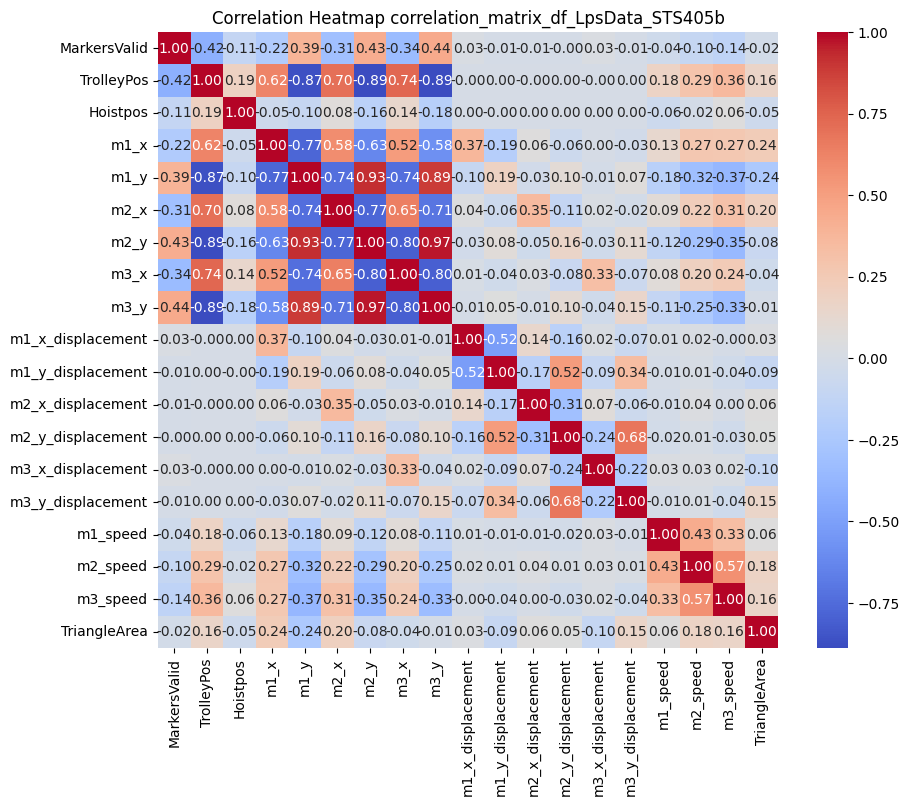

In [410]:
# Select relevant columns for correlation
columns_of_interest = ['MarkersValid','TrolleyPos', 'Hoistpos','m1_x',	'm1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y','m1_x_displacement', 'm1_y_displacement', 'm2_x_displacement', 'm2_y_displacement', 'm3_x_displacement', 'm3_y_displacement', 'm1_speed', 'm2_speed', 'm3_speed', "TriangleArea"]

# Calculate correlation matrix
correlation_matrix_df_LpsData_STS405b = df_LpsData_STS405b[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df_LpsData_STS405b, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap correlation_matrix_df_LpsData_STS405b')
plt.show()

### without speed

In [411]:
# Assuming df_LpsData_STS405b is your DataFrame with features and target variable (MarkersValid)

# Selecting features
features = ['TrolleyPos', 'Hoistpos','m1_x',	'm1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y', ]

X = df_LpsData_STS405b[features]
y = df_LpsData_STS405b['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=11000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

Logistic Regression:
Accuracy: 0.7438423645320197
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.06      0.10       102
           1       0.76      0.97      0.85       304

    accuracy                           0.74       406
   macro avg       0.59      0.52      0.48       406
weighted avg       0.67      0.74      0.66       406


Random Forest:
Accuracy: 0.8891625615763546
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       102
           1       0.91      0.95      0.93       304

    accuracy                           0.89       406
   macro avg       0.87      0.83      0.84       406
weighted avg       0.89      0.89      0.89       406


Support Vector Machine:
Accuracy: 0.7487684729064039
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       102
           1       

### with speed

In [412]:
# Assuming df_LpsData_STS405b is your DataFrame with features and target variable (MarkersValid)

# Selecting features
features_speed = ['TrolleyPos',  'm1_speed', 'm2_speed', 'm3_speed' ]

X = df_LpsData_STS405b[features_speed]
y = df_LpsData_STS405b['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=11000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

Logistic Regression:
Accuracy: 0.7487684729064039
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       102
           1       0.75      1.00      0.86       304

    accuracy                           0.75       406
   macro avg       0.87      0.50      0.43       406
weighted avg       0.81      0.75      0.64       406


Random Forest:
Accuracy: 0.7389162561576355
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.27      0.35       102
           1       0.79      0.89      0.84       304

    accuracy                           0.74       406
   macro avg       0.63      0.58      0.59       406
weighted avg       0.71      0.74      0.71       406


Support Vector Machine:
Accuracy: 0.7487684729064039
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       102
           1       

### all_features

In [413]:
all_features = ['TrolleyPos', 'Hoistpos','m1_x',	'm1_y',	'm2_x',	'm2_y'	,'m3_x',	'm3_y','m1_x_displacement', 'm1_y_displacement', 'm2_x_displacement', 'm2_y_displacement', 'm3_x_displacement', 'm3_y_displacement', 'm1_speed', 'm2_speed', 'm3_speed', "TriangleArea"]

X = df_LpsData_STS405b[all_features]
y = df_LpsData_STS405b['MarkersValid']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=11000)
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # Adding zero_division parameter

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Adding zero_division parameter


# Initialize models
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()

# Train models
svm_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

Logistic Regression:
Accuracy: 0.7610837438423645
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.13      0.21       102
           1       0.77      0.97      0.86       304

    accuracy                           0.76       406
   macro avg       0.69      0.55      0.54       406
weighted avg       0.73      0.76      0.70       406


Random Forest:
Accuracy: 0.8152709359605911
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.42      0.53       102
           1       0.83      0.95      0.88       304

    accuracy                           0.82       406
   macro avg       0.78      0.68      0.71       406
weighted avg       0.80      0.82      0.80       406


Support Vector Machine:
Accuracy: 0.7487684729064039
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       102
           1       